In [11]:
import timm
import torch

In [3]:
from pprint import pprint
model_names = timm.list_models(pretrained=True)
pprint(model_names)

['bat_resnext26ts.ch_in1k',
 'beit_base_patch16_224.in22k_ft_in22k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k',
 'beit_large_patch16_224.in22k_ft_in22k_in1k',
 'beit_large_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_512.in22k_ft_in22k_in1k',
 'beitv2_base_patch16_224.in1k_ft_in1k',
 'beitv2_base_patch16_224.in1k_ft_in22k',
 'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
 'beitv2_large_patch16_224.in1k_ft_in1k',
 'beitv2_large_patch16_224.in1k_ft_in22k',
 'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
 'botnet26t_256.c1_in1k',
 'caformer_b36.sail_in1k',
 'caformer_b36.sail_in1k_384',
 'caformer_b36.sail_in22k',
 'caformer_b36.sail_in22k_ft_in1k',
 'caformer_b36.sail_in22k_ft_in1k_384',
 'caformer_m36.sail_in1k',
 'caformer_m36.sail_in1k_384',
 'caformer_m36.sail_in22k',
 'caformer_m36.sail_in22k_ft_in1k',
 'caformer_m36.sail_in22k_ft_in1k_384',
 'caformer_s18.sail_in1k',
 'caformer_s18.s

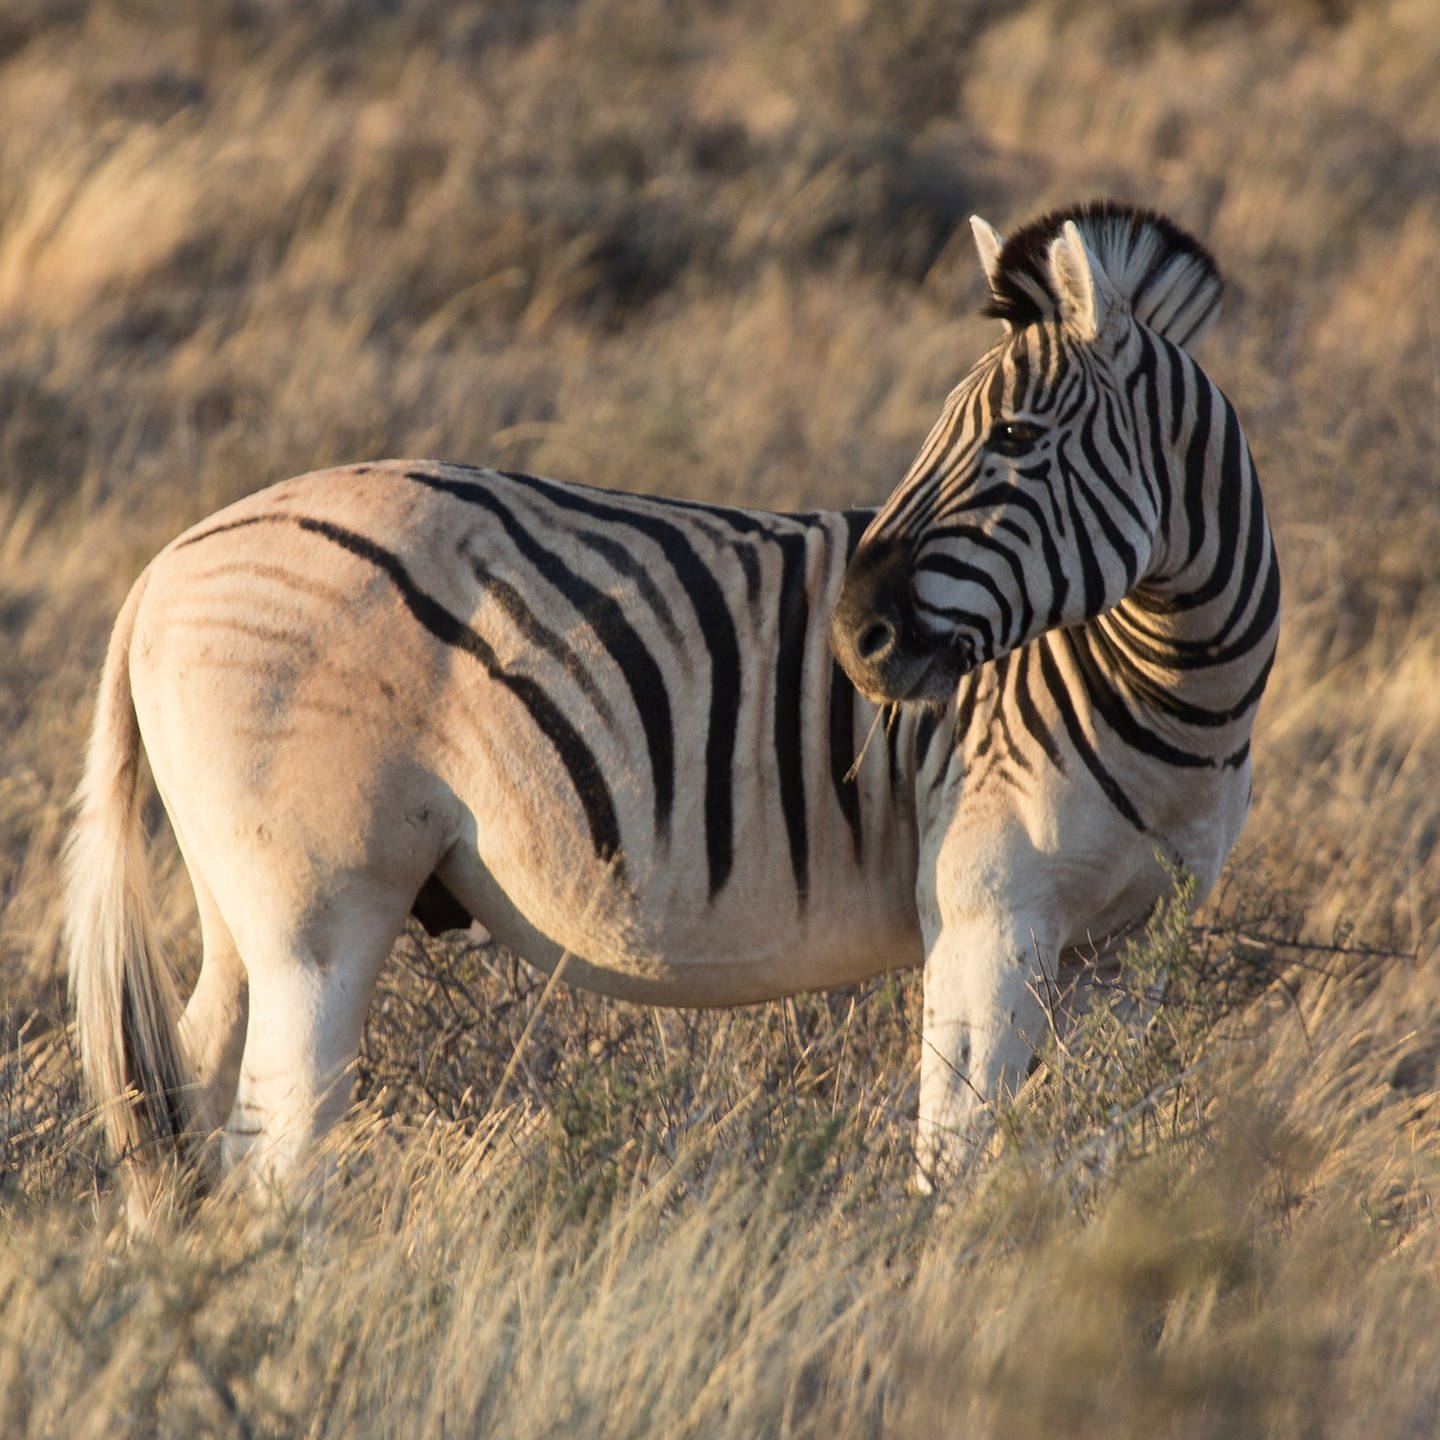

In [6]:
import requests
from PIL import Image
from io import BytesIO

url = 'https://www.kindernetz.de/wissen/tierlexikon/1653527080595%2Csteppenzebra-100~_v-1x1@2dL_-029cdd853d61a51824ed2ee643deeae504b065c1.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

In [15]:
model = timm.create_model('vit_base_patch16_clip_224.openai_ft_in1k', pretrained=True).eval()
transform = timm.data.create_transform(
    **timm.data.resolve_data_config(model.pretrained_cfg)
)

model.safetensors: 100%|██████████| 346M/346M [00:14<00:00, 24.6MB/s] 


In [16]:
image_tensor = transform(image)
image_tensor.shape

torch.Size([3, 224, 224])

In [17]:
output = model(image_tensor.unsqueeze(0))
output.shape

torch.Size([1, 1000])

In [18]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)
probabilities.shape

torch.Size([1000])

In [19]:
values, indices = torch.topk(probabilities, 5)
indices

tensor([340, 351, 292, 352,   9])

In [20]:
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'
IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')
[{'label': IMAGENET_1k_LABELS[idx], 'value': val.item()} for val, idx in zip(values, indices)]

[{'label': 'zebra', 'value': 0.9282963871955872},
 {'label': 'hartebeest', 'value': 0.0020070322789251804},
 {'label': 'tiger, Panthera_tigris', 'value': 0.0009749485179781914},
 {'label': 'impala, Aepyceros_melampus', 'value': 0.0009539277525618672},
 {'label': 'ostrich, Struthio_camelus', 'value': 0.0009491820819675922}]